In [1]:
#import required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

#to suppress warnings
import warnings
warnings.filterwarnings('ignore')


#Load data
MAX_ROWs = 10000

#Load Train data
train_identity_df = pd.read_csv("../data/raw/train_identity.csv", nrows = MAX_ROWs)
train_transaction_df = pd.read_csv("../data/raw/train_transaction.csv", nrows = MAX_ROWs)

#Load Test data
test_identity_df = pd.read_csv("../data/raw/test_identity.csv", nrows = MAX_ROWs)
test_transaction_df = pd.read_csv("../data/raw/test_transaction.csv", nrows = MAX_ROWs)

#check data for transaction
train_transaction_df.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
print("Credit Card Fraud Detection data set of transaction -  rows:",train_transaction_df.shape[0]," columns:", train_transaction_df.shape[1])

Credit Card Fraud Detection data set of transaction -  rows: 10000  columns: 394


In [3]:
train_transaction_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,9881.000000,9999.000000,9978.000000,9087.000000,9087.000000,...,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,2.992000e+06,0.026500,186909.442000,131.532165,9825.539700,349.267483,152.733973,200.322008,292.443711,87.006933,...,0.120578,39.289531,56.861372,46.033213,1.405054,12.217329,4.773285,12.339350,16.777617,13.411552
std,2.886896e+03,0.160625,56572.671722,215.136534,4776.768939,157.779179,10.195412,39.085677,103.678309,0.249711,...,0.504935,247.144816,280.207885,257.257797,10.527619,79.178968,41.864604,85.790571,110.710623,90.006645
min,2.987000e+06,0.000000,86400.000000,1.896000,1011.000000,100.000000,100.000000,100.000000,110.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.989500e+06,0.000000,146628.750000,44.000000,6381.000000,194.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.992000e+06,0.000000,171644.000000,74.950000,9500.000000,327.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.994499e+06,0.000000,240112.000000,131.058000,13780.000000,500.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.996999e+06,1.000000,313121.000000,3247.910000,18390.000000,600.000000,225.000000,237.000000,536.000000,96.000000,...,6.000000,6300.000000,6300.000000,6300.000000,150.000000,1300.000000,1300.000000,1500.000000,1630.000000,1500.000000


In [4]:
#Check missing data for transaction dataset
total = train_transaction_df.isnull().sum().sort_values(ascending = False)
percent = (train_transaction_df.isnull().sum()/train_transaction_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,D7,D13,dist2,D12,D14,D6,D9,D8,V143,V156,...,V110,V111,V112,V113,V114,V115,C4,C5,C6,TransactionID
Total,9777.00,9720.0,9622.00,9594.00,9550.0,9509.00,8900.0,8900.0,8618.00,8618.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,97.77,97.2,96.22,95.94,95.5,95.09,89.0,89.0,86.18,86.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#check data for identity dataset
train_identity_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
print("Credit Card Fraud Detection data set of identity -  rows:",train_identity_df.shape[0]," columns:", train_identity_df.shape[1])

Credit Card Fraud Detection data set of identity -  rows: 10000  columns: 41


In [7]:
train_identity_df.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.000000e+04,10000.000000,9750.000000,4579.000000,4579.000000,9479.000000,9479.000000,359.000000,359.000000,5394.000000,...,9664.000000,2917.000000,9664.000000,9661.000000,356.000000,360.000000,332.000000,359.000000,360.000000,6836.000000
mean,3.006248e+06,-8.047200,135539.437026,0.098930,-0.074689,1.873615,-5.940395,13.164345,-39.506964,0.144049,...,180.751242,13.992458,362.886072,391.120070,430.553371,15.369444,13.075301,338.348189,152.558333,26.505559
std,9.699861e+03,13.671623,125720.300245,0.679248,0.758879,5.242873,16.160213,10.523889,28.826670,1.080745,...,27.118625,1.468909,146.623861,152.850582,219.355561,5.702432,2.061822,114.884585,31.891039,3.738269
min,2.987004e+06,-100.000000,1120.000000,-9.000000,-13.000000,-30.000000,-100.000000,-16.000000,-100.000000,-22.000000,...,100.000000,11.000000,100.000000,100.000000,114.000000,14.000000,11.000000,102.000000,100.000000,16.000000
25%,2.998165e+06,-5.000000,52055.500000,0.000000,0.000000,0.000000,-4.000000,4.000000,-50.000000,0.000000,...,166.000000,13.000000,266.000000,222.000000,252.000000,14.000000,11.000000,315.500000,121.000000,24.000000
50%,3.007364e+06,-5.000000,99010.000000,0.000000,0.000000,0.000000,0.000000,14.000000,-33.000000,0.000000,...,166.000000,15.000000,352.000000,401.000000,291.500000,14.000000,15.000000,321.000000,161.000000,24.000000
75%,3.014634e+06,0.000000,176180.250000,0.000000,0.000000,1.000000,0.000000,21.000000,-19.500000,0.000000,...,225.000000,15.000000,492.000000,533.000000,596.000000,14.000000,15.000000,426.000000,182.000000,32.000000
max,3.021387e+06,0.000000,998295.000000,9.000000,0.000000,52.000000,0.000000,39.000000,0.000000,14.000000,...,225.000000,26.000000,670.000000,638.000000,853.000000,41.000000,16.000000,533.000000,216.000000,32.000000


In [8]:
#Check missing data for identity dataset
total = train_identity_df.isnull().sum().sort_values(ascending = False)
percent = (train_identity_df.isnull().sum()/train_identity_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,id_24,id_21,id_08,id_07,id_25,id_26,id_27,id_23,id_22,id_18,...,id_11,id_02,id_35,id_36,id_37,id_38,DeviceType,id_01,id_12,TransactionID
Total,9668.00,9644.00,9641.00,9641.00,9641.00,9640.0,9640.0,9640.0,9640.0,7083.00,...,250.0,250.0,250.0,250.0,250.0,250.0,250.0,0.0,0.0,0.0
Percent,96.68,96.44,96.41,96.41,96.41,96.4,96.4,96.4,96.4,70.83,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,0.0,0.0,0.0


In [96]:
#there are many columns and some of them contains maximum null values, So we take some columns
trans_column = ['TransactionID','isFraud','TransactionAmt','ProductCD','card1','card2','card4','addr1','P_emaildomain','C1']
id_column = ['id_01','id_03','id_17']

In [97]:
df_train_trans = train_transaction_df[trans_column].copy()
df_train_trans.describe()

,TransactionID,isFraud,TransactionAmt,card1,card2,addr1,C1
count,1.000000e+04,10000.000000,10000.000000,10000.000000,9881.000000,9087.000000,10000.000000
mean,2.992000e+06,0.026500,131.532165,9825.539700,349.267483,292.443711,8.404800
std,2.886896e+03,0.160625,215.136534,4776.768939,157.779179,103.678309,34.574136
min,2.987000e+06,0.000000,1.896000,1011.000000,100.000000,110.000000,0.000000
25%,2.989500e+06,0.000000,44.000000,6381.000000,194.000000,204.000000,1.000000
50%,2.992000e+06,0.000000,74.950000,9500.000000,327.000000,299.000000,1.000000
75%,2.994499e+06,0.000000,131.058000,13780.000000,500.000000,330.000000,3.000000
max,2.996999e+06,1.000000,3247.910000,18390.000000,600.000000,536.000000,735.000000


In [98]:
df_train_identity = train_identity_df[id_column].copy()
df_train_identity.describe()

,id_01,id_03,id_17
count,10000.000000,4579.000000,9664.000000
mean,-8.047200,0.098930,180.751242
std,13.671623,0.679248,27.118625
min,-100.000000,-9.000000,100.000000
25%,-5.000000,0.000000,166.000000
50%,-5.000000,0.000000,166.000000
75%,0.000000,0.000000,225.000000
max,0.000000,9.000000,225.000000


In [99]:
#Join Transaction and Identity dataset
train_df = df_train_trans.merge(df_train_identity, how='left', left_index=True, right_index=True)

In [100]:
train_df.head()

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card4,addr1,P_emaildomain,C1,id_01,id_03,id_17
0,2987000,0,68.5,W,13926,NaN,discover,315.0,NaN,1.0,0.0,NaN,166.0
1,2987001,0,29.0,W,2755,404.0,mastercard,325.0,gmail.com,1.0,-5.0,NaN,166.0
2,2987002,0,59.0,W,4663,490.0,visa,330.0,outlook.com,1.0,-5.0,0.0,121.0
3,2987003,0,50.0,W,18132,567.0,mastercard,476.0,yahoo.com,2.0,-5.0,NaN,225.0
4,2987004,0,50.0,H,4497,514.0,mastercard,420.0,gmail.com,1.0,0.0,0.0,166.0


In [101]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   10000 non-null  int64  
 1   isFraud         10000 non-null  int64  
 2   TransactionAmt  10000 non-null  float64
 3   ProductCD       10000 non-null  object 
 4   card1           10000 non-null  int64  
 5   card2           9881 non-null   float64
 6   card4           9999 non-null   object 
 7   addr1           9087 non-null   float64
 8   P_emaildomain   7895 non-null   object 
 9   C1              10000 non-null  float64
 10  id_01           10000 non-null  float64
 11  id_03           4579 non-null   float64
 12  id_17           9664 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 1015.8+ KB


In [102]:
train_df.isnull().sum()

TransactionID        0
isFraud              0
TransactionAmt       0
ProductCD            0
card1                0
card2              119
card4                1
addr1              913
P_emaildomain     2105
C1                   0
id_01                0
id_03             5421
id_17              336
dtype: int64

In [106]:
#clean columns
#function to clean columns containing numerical values
def impute_median(df, column_name):
    median_value = df[~df[column_name].astype(str).str.contains('NA')][column_name].astype(float).median()
    df.loc[df[column_name].astype(str).str.contains('NA'), column_name] = median_value
    df[column_name] = df[column_name].fillna(median_value)
    
    return df

#clean column card_2
train_df = impute_median(train_df, 'card2')

#clean column id_25
#train_df = impute_median(train_df, 'id_25')

#clean column addr1
train_df = impute_median(train_df, 'addr1')

#clean column id_3
train_df = impute_median(train_df, 'id_03')

#clean column id_17
train_df = impute_median(train_df, 'id_17')

#clean column V1
#train_df = impute_median(train_df, 'V1')


#median_value_card2 = train_df[~train_df['card2'].astype(str).str.contains('NA')]['card2'].astype(float).median()
#train_df.loc[train_df['card2'].astype(str).str.contains('NA'), 'card2'] = median_value_card2
#train_df['card2'] = train_df['card2'].fillna(median_value_card2)

In [107]:
train_df.isnull().sum()

TransactionID        0
isFraud              0
TransactionAmt       0
ProductCD            0
card1                0
card2                0
card4                1
addr1                0
P_emaildomain     2105
C1                   0
id_01                0
id_03                0
id_17                0
dtype: int64

In [108]:
#Clean categorical columns
#train_df['card4'].value_counts()
train_df['card4'] = train_df['card4'].fillna('visa')

In [109]:
#clean column P_emaildomain
#train_df['P_emaildomain'].value_counts()
train_df['P_emaildomain'] = train_df['P_emaildomain'].fillna('gmail.com')

In [110]:
#Clean column R_emaildomain
#train_df['R_emaildomain'].value_counts()
#train_df['R_emaildomain'] = train_df['R_emaildomain'].fillna('gmail.com')

In [111]:
#clean column DeviceType
#train_df['DeviceType'].value_counts()
#train_df['DeviceType'] = train_df['DeviceType'].fillna('desktop')

In [112]:
#clean column DeviceInfo
#train_df['DeviceInfo'].value_counts()
#train_df['DeviceInfo'] = train_df['DeviceInfo'].fillna('Windows')

In [114]:
train_df.isnull().sum()

TransactionID     0
isFraud           0
TransactionAmt    0
ProductCD         0
card1             0
card2             0
card4             0
addr1             0
P_emaildomain     0
C1                0
id_01             0
id_03             0
id_17             0
dtype: int64

In [115]:
#Data exploration
train_df['isFraud'].value_counts()

isFraud
0    9735
1     265
Name: count, dtype: int64

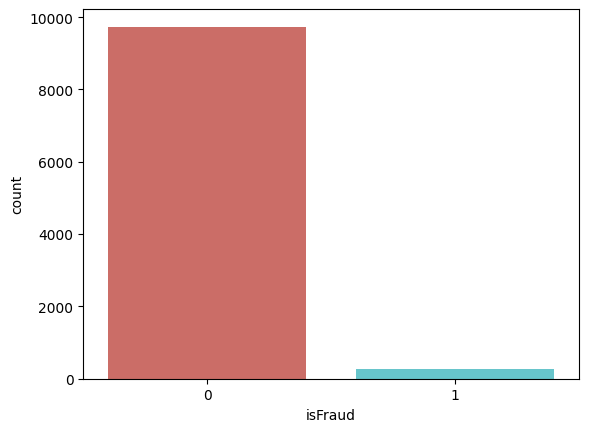

In [25]:
sns.countplot(x = 'isFraud', data = train_df, palette='hls', )
plt.show()

In [26]:
count_no_fraud = len(train_df[train_df['isFraud']==0])
count_fraud = len(train_df[train_df['isFraud']==1])
pct_of_no_fraud = count_no_fraud/(count_no_fraud + count_fraud)
print("percentage of not fraud transaction is", pct_of_no_fraud*100)
pct_of_sub = count_fraud/(count_no_fraud + count_fraud)
print("percentage of fraud transaction is", pct_of_sub*100)

percentage of not fraud transaction is 97.35000000000001
percentage of fraud transaction is 2.65


In [116]:
train_df.groupby('isFraud').mean(numeric_only=True)

,TransactionID,TransactionAmt,card1,card2,addr1,C1,id_01,id_03,id_17
isFraud,,,,,,,,,
0,2.991985e+06,131.034187,9864.293888,348.742989,293.085670,8.351104,-8.037699,0.045711,180.286595
1,2.992524e+06,149.825823,8401.871698,358.535849,291.449057,10.377358,-8.396226,0.030189,179.116981


In [117]:
# We can calculate categorical means for other categorical variables such as card4, deviceType 
# to get a more detailed sense of our data.
train_df.groupby('ProductCD').mean(numeric_only=True)

,TransactionID,isFraud,TransactionAmt,card1,card2,addr1,C1,id_01,id_03,id_17
ProductCD,,,,,,,,,,
C,2.992208e+06,0.103753,41.406691,9996.921634,386.073951,299.000000,3.581678,-8.023179,0.041943,180.509934
H,2.992539e+06,0.013777,70.523536,10220.053961,385.024110,298.901263,1.070034,-6.969001,0.049369,180.673938
R,2.991836e+06,0.055738,161.065574,9508.285246,376.098361,312.275410,25.521311,-9.170492,0.059016,178.645902
S,2.991862e+06,0.047847,53.019139,10213.712919,360.645933,308.842105,3.000000,-8.181818,0.033493,177.062201
W,2.991924e+06,0.017123,149.977324,9762.851991,339.188092,290.490855,9.269685,-8.123751,0.045012,180.328707


In [118]:
train_df.groupby('card4').mean(numeric_only=True)

,TransactionID,isFraud,TransactionAmt,card1,card2,addr1,C1,id_01,id_03,id_17
card4,,,,,,,,,,
american express,2.992442e+06,0.017857,114.285714,9001.500000,412.303571,297.696429,1.223214,-10.017857,-0.017857,179.107143
discover,2.992450e+06,0.032609,265.194022,4300.250000,329.456522,298.597826,51.521739,-7.500000,0.097826,178.184783
mastercard,2.991886e+06,0.032627,126.254418,9459.881484,322.999721,288.519520,8.396542,-8.180982,0.037089,180.524261
visa,2.992050e+06,0.023027,132.910702,10133.409179,363.165862,295.487762,7.900322,-7.942512,0.050403,180.151852


In [120]:
#train_df.groupby('DeviceType').mean(numeric_only=True)

Text(0, 0.5, 'No. of transaction')

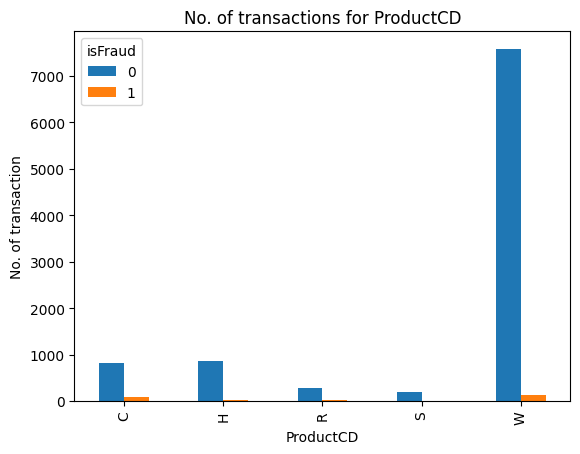

In [31]:
#Visualization
%matplotlib inline
pd.crosstab(train_df.ProductCD,train_df.isFraud).plot(kind='bar')
plt.title('No. of transactions for ProductCD')
plt.xlabel('ProductCD')
plt.ylabel('No. of transaction')
#plt.savefig('purchase_fre_job')

Text(0, 0.5, 'No. of transaction')

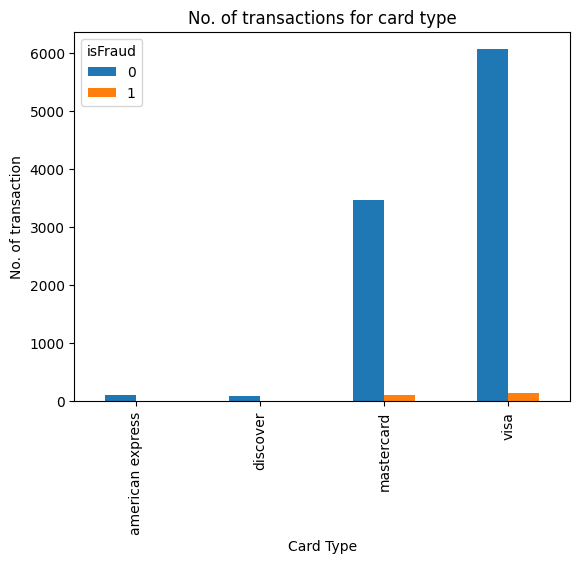

In [32]:
%matplotlib inline
pd.crosstab(train_df.card4,train_df.isFraud).plot(kind='bar')
plt.title('No. of transactions for card type')
plt.xlabel('Card Type')
plt.ylabel('No. of transaction')
#plt.savefig('purchase_fre_job')

In [121]:
'''
%matplotlib inline
pd.crosstab(train_df.P_emaildomain,train_df.isFraud).plot(kind='bar')
plt.title('No. of transactions for Email domain')
plt.xlabel('Emaildomain')
plt.ylabel('No. of transaction')
#plt.savefig('purchase_fre_job')
'''

"\n%matplotlib inline\npd.crosstab(train_df.P_emaildomain,train_df.isFraud).plot(kind='bar')\nplt.title('No. of transactions for Email domain')\nplt.xlabel('Emaildomain')\nplt.ylabel('No. of transaction')\n#plt.savefig('purchase_fre_job')\n"

In [122]:
train_df.corr(numeric_only=True)

,TransactionID,isFraud,TransactionAmt,card1,card2,addr1,C1,id_01,id_03,id_17
TransactionID,1.000000,0.030003,-0.074021,0.018435,0.009564,-0.001437,-0.018740,0.012155,-0.003869,-0.042750
isFraud,0.030003,1.000000,0.014030,-0.049176,0.010028,-0.002659,0.009414,-0.004212,-0.005394,-0.007012
TransactionAmt,-0.074021,0.014030,1.000000,-0.012507,-0.011785,-0.019157,-0.030639,-0.018488,-0.001497,0.010443
card1,0.018435,-0.049176,-0.012507,1.000000,0.041676,0.008487,-0.011539,0.011577,0.012835,0.000395
card2,0.009564,0.010028,-0.011785,0.041676,1.000000,0.027320,-0.023346,0.015165,0.000990,-0.012135
addr1,-0.001437,-0.002659,-0.019157,0.008487,0.027320,1.000000,0.018615,0.000741,-0.015249,0.003527
C1,-0.018740,0.009414,-0.030639,-0.011539,-0.023346,0.018615,1.000000,0.007989,-0.001542,-0.007710
id_01,0.012155,-0.004212,-0.018488,0.011577,0.015165,0.000741,0.007989,1.000000,0.066156,-0.121378
id_03,-0.003869,-0.005394,-0.001497,0.012835,0.000990,-0.015249,-0.001542,0.066156,1.000000,-0.041984
id_17,-0.042750,-0.007012,0.010443,0.000395,-0.012135,0.003527,-0.007710,-0.121378,-0.041984,1.000000


<Axes: >

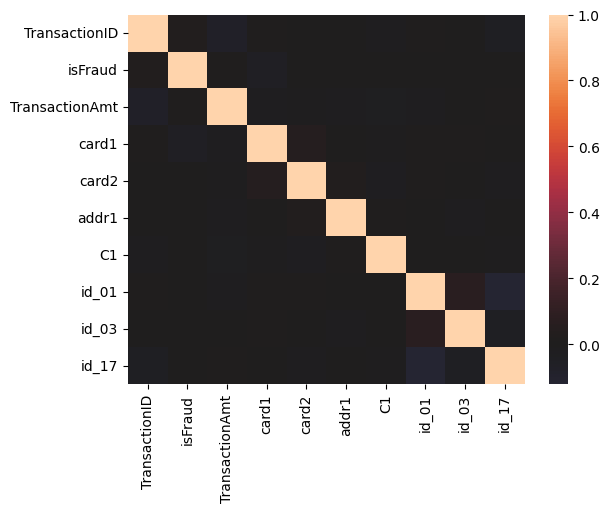

In [123]:
sns.heatmap(train_df.corr(numeric_only=True), center=0)

In [36]:
#train_df['TransactionAmt'].plot(kind = 'kde')

In [124]:
# make dummies for card4
#train_df['ProductCD'] = 
pd.get_dummies(train_df['ProductCD'])

#t = pd.get_dummies(train_df['card4'], drop_first=True)
#t
#train_df['card4'] = t
#pd.get_dummies(train_df, prefix=['card4'], drop_first=True)

#all_results = pd.get_dummies(train_df['card4'], columns=train_df['card4']) #, drop_first=True)
#train_df['card4'] = train_df.join(all_results)


,C,H,R,S,W
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,True,False,False,False
...,...,...,...,...,...
9995,False,True,False,False,False
9996,False,False,False,False,True
9997,False,False,False,False,True
9998,False,False,False,False,True


In [125]:
train_df

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card4,addr1,P_emaildomain,C1,id_01,id_03,id_17
0,2987000,0,68.50,W,13926,327.0,discover,315.0,gmail.com,1.0,0.0,0.0,166.0
1,2987001,0,29.00,W,2755,404.0,mastercard,325.0,gmail.com,1.0,-5.0,0.0,166.0
2,2987002,0,59.00,W,4663,490.0,visa,330.0,outlook.com,1.0,-5.0,0.0,121.0
3,2987003,0,50.00,W,18132,567.0,mastercard,476.0,yahoo.com,2.0,-5.0,0.0,225.0
4,2987004,0,50.00,H,4497,514.0,mastercard,420.0,gmail.com,1.0,0.0,0.0,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2996995,0,40.00,H,13052,254.0,visa,330.0,gmail.com,1.0,-10.0,0.0,166.0
9996,2996996,0,57.00,W,11137,327.0,visa,387.0,mail.com,52.0,-20.0,0.0,225.0
9997,2996997,0,108.95,W,15627,239.0,mastercard,330.0,gmail.com,12.0,-15.0,0.0,225.0
9998,2996998,0,160.95,W,7207,111.0,visa,204.0,gmail.com,1.0,-5.0,0.0,166.0


In [126]:
#check data for test transaction
test_transaction_df.describe()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,9887.000000,10000.000000,9973.000000,9435.000000,9435.000000,5320.000000,...,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,3.668548e+06,1.857137e+07,141.004778,9881.547300,350.020229,151.135800,200.913567,290.093588,86.925808,85.361654,...,0.314410,762.294032,829.468705,785.138282,51.893741,97.276565,61.838428,140.043668,153.802038,145.963610
std,2.886896e+03,8.153642e+04,229.745361,4732.635688,157.487188,8.272896,39.808169,103.122407,1.901654,334.213240,...,1.220624,4749.048294,4756.373990,4749.245757,404.022138,448.342765,405.276613,856.042064,871.804271,864.893441
min,3.663549e+06,1.840322e+07,0.246000,1030.000000,100.000000,100.000000,100.000000,110.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.666049e+06,1.849519e+07,49.000000,6481.000000,194.000000,150.000000,166.000000,204.000000,87.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.668548e+06,1.857204e+07,77.000000,9500.000000,327.000000,150.000000,226.000000,299.000000,87.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.671048e+06,1.864099e+07,144.950000,13741.500000,490.000000,150.000000,226.000000,330.000000,87.000000,19.000000,...,0.000000,25.000000,100.000000,72.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.673548e+06,1.872084e+07,7777.490000,18385.000000,600.000000,223.000000,236.000000,536.000000,96.000000,8081.000000,...,11.000000,48480.000000,48480.000000,48480.000000,3600.000000,3600.000000,3600.000000,12000.000000,12000.000000,12000.000000


In [40]:
test_transaction_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
print("Credit Card Fraud Detection data set of Test transaction -  rows:",test_transaction_df.shape[0]," columns:", test_transaction_df.shape[1])

Credit Card Fraud Detection data set of Test transaction -  rows: 10000  columns: 393


In [42]:
total = test_identity_df.isnull().sum().sort_values(ascending = False)
percent = (test_identity_df.isnull().sum()/test_identity_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,id-24,id-25,id-21,id-07,id-08,id-23,id-22,id-26,id-27,id-18,...,id-11,id-02,id-15,id-35,id-36,id-37,id-38,id-01,id-12,TransactionID
Total,9674.00,9649.00,9647.00,9647.00,9647.00,9646.00,9646.00,9646.00,9646.00,6440.0,...,288.00,280.0,279.00,279.00,279.00,279.00,279.00,0.0,0.0,0.0
Percent,96.74,96.49,96.47,96.47,96.47,96.46,96.46,96.46,96.46,64.4,...,2.88,2.8,2.79,2.79,2.79,2.79,2.79,0.0,0.0,0.0


In [132]:
#Test data preparation
test_trans_column = ['TransactionID','TransactionAmt','ProductCD','card1','card2','card4','addr1','P_emaildomain', 'C1']
test_id_column = ['id-01','id-03','id-17']

In [133]:
df_test_trans = test_transaction_df[test_trans_column].copy()
df_test_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   10000 non-null  int64  
 1   TransactionAmt  10000 non-null  float64
 2   ProductCD       10000 non-null  object 
 3   card1           10000 non-null  int64  
 4   card2           9887 non-null   float64
 5   card4           9998 non-null   object 
 6   addr1           9435 non-null   float64
 7   P_emaildomain   8245 non-null   object 
 8   C1              10000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 703.2+ KB


In [134]:
df_test_identity = test_identity_df[test_id_column].copy()
df_test_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id-01   10000 non-null  float64
 1   id-03   5151 non-null   float64
 2   id-17   9612 non-null   float64
dtypes: float64(3)
memory usage: 234.5 KB


In [135]:
#Join Transaction and Identity for test dataset
test_df = df_test_trans.merge(df_test_identity, how='left', left_index=True, right_index=True)

In [136]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   10000 non-null  int64  
 1   TransactionAmt  10000 non-null  float64
 2   ProductCD       10000 non-null  object 
 3   card1           10000 non-null  int64  
 4   card2           9887 non-null   float64
 5   card4           9998 non-null   object 
 6   addr1           9435 non-null   float64
 7   P_emaildomain   8245 non-null   object 
 8   C1              10000 non-null  float64
 9   id-01           10000 non-null  float64
 10  id-03           5151 non-null   float64
 11  id-17           9612 non-null   float64
dtypes: float64(7), int64(2), object(3)
memory usage: 937.6+ KB


In [48]:
#clean the numeric test data

#clean column card_2
test_df = impute_median(test_df, 'card2')

#clean column id_25
test_df = impute_median(test_df, 'id-25')

#clean column addr1
test_df = impute_median(test_df, 'addr1')

#clean column id_3
test_df = impute_median(test_df, 'id-03')

#clean column id_17
test_df = impute_median(test_df, 'id-17')

#clean column V1
test_df = impute_median(test_df, 'V1')

In [49]:
#clean categorical data
test_df['card4'].value_counts()

card4
visa                6428
mastercard          3472
american express      58
discover              40
Name: count, dtype: int64

In [50]:
test_df['card4'] = test_df['card4'].fillna('visa')

In [51]:
#clean P_emaildomain
test_df['P_emaildomain'].value_counts()

P_emaildomain
gmail.com          4034
yahoo.com          1769
anonymous.com       541
hotmail.com         512
aol.com             498
icloud.com          106
comcast.net         105
att.net              94
msn.com              66
outlook.com          59
live.com             52
ymail.com            50
verizon.net          48
sbcglobal.net        46
bellsouth.net        38
cox.net              25
charter.net          18
mail.com             17
roadrunner.com       13
earthlink.net        12
me.com               11
optonline.net        10
netzero.net           9
gmail                 9
juno.com              8
yahoo.com.mx          7
centurylink.net       7
suddenlink.net        7
q.com                 6
rocketmail.com        6
cfl.rr.com            5
yahoo.fr              5
frontier.com          5
frontiernet.net       4
yahoo.de              4
cableone.net          4
hotmail.es            4
mac.com               3
windstream.net        3
netzero.com           3
twc.com               3
ai

In [52]:
test_df['P_emaildomain'] = test_df['P_emaildomain'].fillna('gmail.com')

In [53]:
test_df['R_emaildomain'] = test_df['R_emaildomain'].fillna('gmail.com')

In [54]:
test_df['DeviceType'].value_counts()

DeviceType
desktop    5212
mobile     4494
Name: count, dtype: int64

In [55]:
test_df['DeviceType'] = test_df['DeviceType'].fillna('desktop')

In [56]:
test_df['DeviceInfo'].value_counts()

DeviceInfo
Windows                          3064
iOS Device                       1222
MacOS                             669
Trident/7.0                       383
rv:11.0                           100
                                 ... 
BND-L21 Build/HONORBND-L21          1
SAMSUNG-SM-G920A Build/MMB29K       1
LG-H650 Build/LMY47V                1
Nexus 6 Build/N6F27M                1
VIE-L09                             1
Name: count, Length: 565, dtype: int64

In [57]:
test_df['DeviceInfo'] = test_df['DeviceInfo'].fillna('Windows')

In [58]:
test_df.isnull().sum()

TransactionID     0
TransactionAmt    0
ProductCD         0
card1             0
card2             0
card4             0
addr1             0
P_emaildomain     0
R_emaildomain     0
C1                0
V1                0
id-01             0
id-03             0
id-17             0
id-25             0
DeviceType        0
DeviceInfo        0
dtype: int64

In [59]:
#Rename the column of test data as per train data
test_df.rename(
    columns={"id-01": "id_01", "id-03": "id_03", "id-17": "id_17", "id-17": "id_17", "id-25": "id_25" },
    inplace=True,
)

In [60]:
train_df.columns

Index(['TransactionID', 'isFraud', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card4', 'addr1', 'P_emaildomain', 'R_emaildomain', 'C1', 'V1',
       'id_01', 'id_03', 'id_17', 'id_25', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [61]:
#categorical columns
numericCols = train_df._get_numeric_data().columns
categoricalCols = list(set(train_df) - set(numericCols))
print('The categorical columns in training data are: ',categoricalCols)

The categorical columns in training data are:  ['card4', 'R_emaildomain', 'P_emaildomain', 'DeviceInfo', 'ProductCD', 'DeviceType']


In [62]:
test_df.columns

Index(['TransactionID', 'TransactionAmt', 'ProductCD', 'card1', 'card2',
       'card4', 'addr1', 'P_emaildomain', 'R_emaildomain', 'C1', 'V1', 'id_01',
       'id_03', 'id_17', 'id_25', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [63]:
#X_train = train_df.loc[:, ['TransactionAmt', 'card1', 'card2', 'addr1']]
#y_train = train_df['isFraud']

#clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf.fit(X_train, y_train)

In [64]:
#print((clf.predict(X_train)).tolist())

In [65]:
#seperating the X and the Y from the dataset
X=train_df.loc[:, ['TransactionAmt', 'card1', 'card2', 'addr1', 'id_01', 'id_03', 'id_17', 'id_25']]
Y=train_df["isFraud"]
print(X.shape)
print(Y.shape)
#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

(10000, 8)
(10000,)


In [66]:
print(X_data.tolist())

[[68.5, 13926.0, 327.0, 315.0, 0.0, 0.0, 166.0, 321.0], [29.0, 2755.0, 404.0, 325.0, -5.0, 0.0, 166.0, 321.0], [59.0, 4663.0, 490.0, 330.0, -5.0, 0.0, 121.0, 321.0], [50.0, 18132.0, 567.0, 476.0, -5.0, 0.0, 225.0, 321.0], [50.0, 4497.0, 514.0, 420.0, 0.0, 0.0, 166.0, 321.0], [49.0, 5937.0, 555.0, 272.0, -5.0, 3.0, 166.0, 321.0], [159.0, 12308.0, 360.0, 126.0, -15.0, 0.0, 166.0, 321.0], [422.5, 12695.0, 490.0, 325.0, 0.0, 0.0, 166.0, 321.0], [15.0, 2803.0, 100.0, 337.0, -10.0, 0.0, 121.0, 321.0], [117.0, 17399.0, 111.0, 204.0, -5.0, 0.0, 225.0, 321.0], [75.887, 16496.0, 352.0, 299.0, -5.0, 0.0, 225.0, 321.0], [16.495, 4461.0, 375.0, 299.0, 0.0, 0.0, 166.0, 321.0], [50.0, 3786.0, 418.0, 204.0, -5.0, 0.0, 166.0, 321.0], [40.0, 12866.0, 303.0, 330.0, 0.0, 0.0, 166.0, 321.0], [10.5, 11839.0, 490.0, 226.0, 0.0, 0.0, 166.0, 321.0], [57.95, 7055.0, 555.0, 315.0, 0.0, 0.0, 225.0, 321.0], [30.0, 1790.0, 555.0, 170.0, -5.0, 0.0, 225.0, 321.0], [100.0, 11492.0, 111.0, 204.0, -5.0, 0.0, 225.0, 321.

In [67]:
X_train = X_data
Y_train = Y_data

In [68]:
X_train

array([[   68.5 , 13926.  ,   327.  , ...,     0.  ,   166.  ,   321.  ],
       [   29.  ,  2755.  ,   404.  , ...,     0.  ,   166.  ,   321.  ],
       [   59.  ,  4663.  ,   490.  , ...,     0.  ,   121.  ,   321.  ],
       ...,
       [  108.95, 15627.  ,   239.  , ...,     0.  ,   225.  ,   321.  ],
       [  160.95,  7207.  ,   111.  , ...,     0.  ,   166.  ,   321.  ],
       [   59.  ,  2803.  ,   100.  , ...,     0.  ,   166.  ,   321.  ]])

In [69]:
print(Y_train.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [70]:
X_test = X.values
X_test

array([[   68.5 , 13926.  ,   327.  , ...,     0.  ,   166.  ,   321.  ],
       [   29.  ,  2755.  ,   404.  , ...,     0.  ,   166.  ,   321.  ],
       [   59.  ,  4663.  ,   490.  , ...,     0.  ,   121.  ,   321.  ],
       ...,
       [  108.95, 15627.  ,   239.  , ...,     0.  ,   225.  ,   321.  ],
       [  160.95,  7207.  ,   111.  , ...,     0.  ,   166.  ,   321.  ],
       [   59.  ,  2803.  ,   100.  , ...,     0.  ,   166.  ,   321.  ]])

In [71]:
#Y_test = Y_train

In [137]:
# random forest model creation
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train,Y_train)
# predictions
y_pred = rfc.predict(X_train)

In [138]:
#y_pred
print(y_pred.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [139]:
#Cross validation to get model performance score
from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(rfc, X, Y, cv=5)
scores

array([0.9735, 0.9735, 0.9735, 0.9735, 0.9735])

In [140]:
Fraud = train_df[train_df['isFraud'] == 1]
Valid = train_df[train_df['isFraud'] == 0]

In [76]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

'''
n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
#MCC=matthews_corrcoef(Y_test,y_pred)
#print("The Matthews correlation coefficient is {}".format(MCC))

'''


'\nn_outliers = len(Fraud)\nn_errors = (y_pred != Y_test).sum()\nprint("The model used is Random Forest classifier")\nacc= accuracy_score(Y_test,y_pred)\nprint("The accuracy is  {}".format(acc))\nprec= precision_score(Y_test,y_pred)\nprint("The precision is {}".format(prec))\nrec= recall_score(Y_test,y_pred)\nprint("The recall is {}".format(rec))\nf1= f1_score(Y_test,y_pred)\nprint("The F1-Score is {}".format(f1))\n#MCC=matthews_corrcoef(Y_test,y_pred)\n#print("The Matthews correlation coefficient is {}".format(MCC))\n\n'

In [77]:
#printing the confusion matrix For Random forest classifier
'''
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
'''

'\nLABELS = [\'Normal\', \'Fraud\']\nconf_matrix = confusion_matrix(Y_test, y_pred)\nplt.figure(figsize=(5, 5))\nsns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");\nplt.title("Confusion matrix")\nplt.ylabel(\'True class\')\nplt.xlabel(\'Predicted class\')\nplt.show()\n\n# Run classification metrics\nplt.figure(figsize=(9, 7))\nprint(\'{}: {}\'.format("Random Forest", n_errors))\nprint(accuracy_score(Y_test, y_pred))\nprint(classification_report(Y_test, y_pred))\n'

In [78]:
#Logistic regression
X1=train_df.loc[:, ['card1', 'card2', 'id_01', 'id_03','C1','V1']]
X1_data=X1.values
X1_train = X1_data
X1_test = X1_data
lr = LogisticRegression()

In [79]:
#training model
lr.fit(X1_train, Y_train)

LogisticRegression()

In [80]:
lr_yhat = lr.predict(X1_train)

In [81]:
print(lr_yhat.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [82]:
#Cross validation
scores1 = cross_val_score(lr, X, Y, cv=5)
scores1

array([0.9735, 0.9735, 0.9735, 0.9735, 0.9735])

In [83]:
#print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(Y_test, lr_yhat)))
"""
n_outliers = len(Fraud)
n_errors = (lr_yhat != Y_test).sum()
print("The model used is Logistic Regression")
acc1= accuracy_score(Y_test,lr_yhat)
print("The accuracy is  {}".format(acc1))
prec1= precision_score(Y_test,lr_yhat)
print("The precision is {}".format(prec1))
rec1= recall_score(Y_test,lr_yhat)
print("The recall is {}".format(rec1))
f11= f1_score(Y_test,lr_yhat)
print("The F1-Score is {}".format(f11))
"""
#MCC=matthews_corrcoef(Y_test,y_pred)
#print("The Matthews correlation coefficient is {}".format(MCC))

'\nn_outliers = len(Fraud)\nn_errors = (lr_yhat != Y_test).sum()\nprint("The model used is Logistic Regression")\nacc1= accuracy_score(Y_test,lr_yhat)\nprint("The accuracy is  {}".format(acc1))\nprec1= precision_score(Y_test,lr_yhat)\nprint("The precision is {}".format(prec1))\nrec1= recall_score(Y_test,lr_yhat)\nprint("The recall is {}".format(rec1))\nf11= f1_score(Y_test,lr_yhat)\nprint("The F1-Score is {}".format(f11))\n'

In [84]:
#printing the confusion matrix for Logistic regression
"""
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
"""

# Run classification metrics
#plt.figure(figsize=(9, 7))
#print('{}: {}'.format("Logistic Regression", n_errors))
#print(accuracy_score(Y_test, y_pred))
#print(classification_report(Y_test, y_pred))

'\nLABELS = [\'Normal\', \'Fraud\']\nconf_matrix = confusion_matrix(Y_test, y_pred)\nplt.figure(figsize=(5, 5))\nsns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");\nplt.title("Confusion matrix")\nplt.ylabel(\'True class\')\nplt.xlabel(\'Predicted class\')\nplt.show()\n'

In [87]:
known_variable = []
#known_variable = X_train.columns
known_variable = ['TransactionAmt', 'card1', 'card2', 'addr1', 'id_01', 'id_03', 'id_17']
models = []
models[0].predict(test_df[known_variable])

collect_predictions = []
for m in models:
    collect_predictions.append(m.predict(test_df[known_variable]))
    


IndexError: list index out of range